In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Imagine for a moment a weather forecaster says that her accuracy is aproximately 75%.  Is this an absolute probability?  Rather not:  the forecaster will use available data and then will make her forecast.  The data on the other hand is subject to measuring incertanity and additionally the model might not be the right one.  
The better expression is then to say that forecaster is aproximately correct in 75% cases when using her model and acquired data.  This sounds like a conditional probability:

$P( \text{ Forecast | Data } ) = 0.75$

What would be a probability of rainy day then?  Our initial intuition says that rainy day is ony 10% probable.  Let's use total probability formula then:

$P( \text{Rainy | Forecast} ) = \frac{P( \text{ Forecast | Data })P( \text{ Rainy } )}{P( \text{ Forecast | Data } )P( \text{ Rainy }) + P( \text{ Incorrect Forcast | Data })P( \text{ Sunny } ) }$


In [20]:
def p_rainy_forecast( p_forecast_data, p_incorrectforecast_data, p_rainy ):
    p = p_forecast_data * p_rainy / ( p_forecast_data * p_rainy + (1.0-p_rainy) * p_incorrectforecast_data )
    return p

Plugging the numbers, we get the following chance of rainy as predicted by the forecster:

In [21]:
p_rainy_forecast( 0.75, 0.25, 0.10 )

0.25

This sounds kind of low.  Only 25% chance of predicting a forecast. Let's take a look how the accuracy will change as a function of forecast performance:

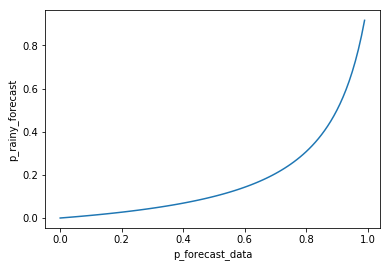

In [22]:
p_forecast_data = np.arange( 0.0, 1.0, 0.01 )

fp_rainy_forecast = np.vectorize( lambda x: p_rainy_forecast( x, 1.0 - x, 0.1 ) )
p_rainy_forecast_ = fphd( p_forecast_data )

plt.plot( p_forecast_data, p_rainy_forecast_ )
plt.xlabel( 'p_forecast_data' )
plt.ylabel( 'p_rainy_forecast' )

At 90% forecast accuracy we get 50% chance of rain, and at 99% the chance of forecasted rain becomes 91.6%.  
The warrants a conclusion that it's best to use very accurate forecasting models.  Right, one may say, this is a common sense knowledge.  Correct, but what's shocking is that at 75% accuracy the chance of forecasted rain is only 25%.